### Imports

In [32]:
import numpy as np
from bond_pricing import equiv_rate, annuity_pv, annuity_fv, annuity_rate, annuity_instalment
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Yields to Maturity on Zero-Coupon Bonds

$$PV=\frac{FV}{(1+\frac{APR_{PER}}{PER})^{Years \times PER}}$$
$$APR_{PER}=\left[\left(\frac{FV}{PV}\right)^{\frac{1}{Years\times PER}} - 1\right]\times PER$$

- PV = present value, or price, of the bond, 
- FV = future value, which usually is 100 (percent of par value) at maturity, 
- Years = number of years to maturity, 
- PER = periodicity—the number of evenly-spaced periods in the year; and 
- $APR_{PER}$ = yield to maturity, stated as an annual percentage rate corresponding to PER.

The “s.a.” tag, commonly used in bond markets, means that the yield is stated on a semiannual bond basis and is an annual percentage rate that has a periodicity of 2. The assumption of two periods in the year, while totally arbitrary, is common in financial markets because the yield on the zero then can be compared directly to yields to maturity on traditional semiannual payment fi xedincome bonds.

In [2]:
pv = 50
fv = 1000
years = 30
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per
print(f'{ytm = : 0.5f} (s.a)')

ytm =  0.10239 (s.a)


In [3]:
pv = 50
fv = 1000
years = 30
per = 2

ytm = annuity_rate(n_periods=years, instalment=0, pv=pv, terminal_payment=fv, immediate_start=False, cf_freq=1, comp_freq=2)
print(f'{ytm = : 0.5f} (s.a)')

ytm =  0.10239 (s.a)


In [4]:
pv = 250
fv = 1000
years = 14
per = 2

ytm = ((fv/pv)**(1/(years)) - 1)
ytm = equiv_rate(rate=ytm, from_freq=1, to_freq=2)
print(f'{ytm = : 0.5f} (s.a)')

ytm =  0.10151 (s.a)


In [5]:
pv = 60
fv = 100
years = 10
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per
print(f'{ytm = : 0.5f} (s.a)')

ytm =  0.05174 (s.a)


### Continuous Compounding 

There are times in bond math when it is convenient to assume continuous compounding. That is, there are assumed to be an infinite number of compounding periods in the year. Continuous-time finance is particularly useful in **interest rate term structure** and **option valuation models**. The formula for the APR given PER = ∞ and the two cash flows PV and FV involves the natural logarithm (LN):

$$APR_{∞}=\frac{1}{Years}\times\ln\left(\frac{FV}{PV}\right)$$
$$APR_{∞}=PER\times\ln\left(1+\frac{APR_{PER}}{PER}\right)$$
$$APR_{PER}=PER\times\left[EXP\left(\frac{APR_{∞}}{PER}\right)-1\right]

In [6]:
pv = 60
fv = 100
years = 10

ytm_1 = np.log(fv/pv) * 1/years
ytm_2 = np.log(1 + 0.05174/2) * 2
ytm_3 = equiv_rate(rate=0.05174, from_freq=2, to_freq=np.inf)
print(f'{ytm_1 = :0.5f}\n{ytm_2 = :0.5f}\n{ytm_3 = :0.5f}')

ytm_1 = 0.05108
ytm_2 = 0.05108
ytm_3 = 0.05108


In [7]:
pv = 60
fv = 100
years = 10

ytm_1 = 2 * (np.exp(0.05108/2) - 1)
ytm_2 = equiv_rate(rate=0.05108, from_freq=np.inf, to_freq=2)
print(f'{ytm_1 = :0.5f}\n{ytm_2 = :0.5f}')

ytm_1 = 0.05174
ytm_2 = 0.05174


### Constant-Yield Price Trajectory / Carrying Value & Horizon Yield

A useful yardstick for assessing a **horizon yield** (holding-period rate of return) when the bond is sold prior to maturity is the **constant-yield price trajectory**. This is the path the bond price will take over the time to maturity assuming no default.

The movement along the constant-yield price trajectory represents **interest earned** and is also called the **carrying values** for the bond.

rate = 0.05174
Year 0 PV = 60.0
Year 1 PV = 63.145
Year 2 PV = 66.454
Year 3 PV = 69.937
Year 4 PV = 73.602
Year 5 PV = 77.46
Year 6 PV = 81.519
Year 7 PV = 85.792
Year 8 PV = 90.288
Year 9 PV = 95.02


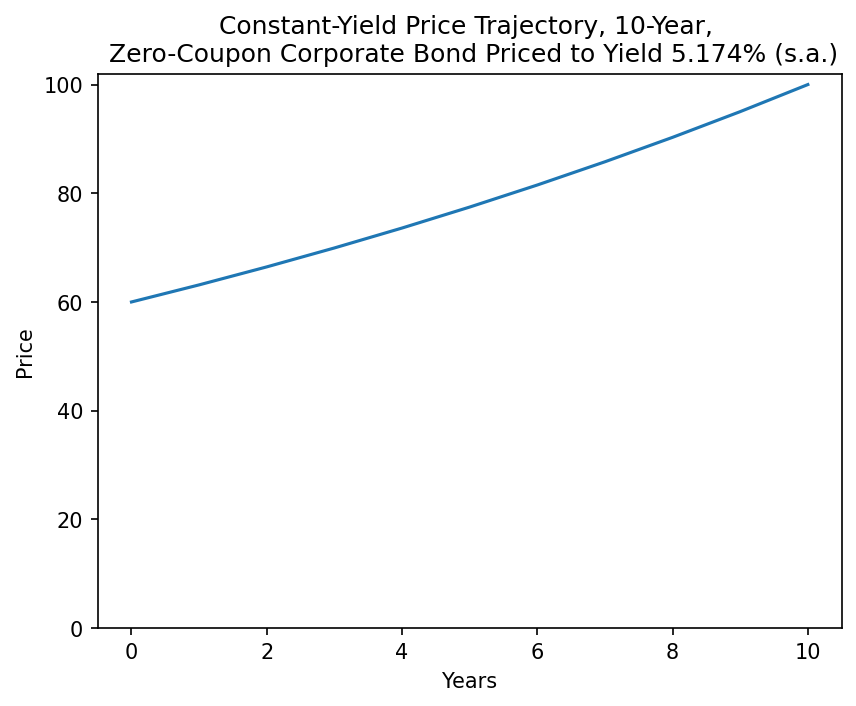

In [8]:
pv = 60
fv = 100
per = 2
years = 10
rate = ((fv/pv)**(1/(years*per)) - 1) * per
print(f'{rate = :0.5f}')

years_x = np.arange(0, 11)

def pv(fv, rate, years, per):
  return fv / ((1 + rate/per)**(years*per))

pv_y = pv(fv, rate, years_x, per)

plt.figure(num=0, dpi=150)
plt.plot(10-years_x, pv_y)
plt.ylim(ymin=0)
plt.title('Constant-Yield Price Trajectory, 10-Year, \n Zero-Coupon Corporate Bond Priced to Yield 5.174% (s.a.)')
plt.xlabel('Years')
plt.ylabel('Price')

for i in range(10):
  print(f"Year {i} PV =", round(fv/(1 + rate/per)**((10-i)*per), 3))

When the investor is able to sell the corporate zero in 2 years at a yield less than 5.174% (s.a.), the sale price will be above the trajectory and there will be a capital gain. For example, suppose that the investor sells the zero at year 2 for a price of 68 (percent of par value). At that time, the now 8-year corporate zero is trading at 4.879% (s.a.).

In [9]:
fv = 100
pv = 68
years = 8
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per * 100
print(f'{ytm = :.5f}%')

ytm = 4.87935%


The investor’s realized 2-year holding-period rate of return turns out to be 6.357% (s.a.), which is greater than the original yield of 5.174% because the **price is above the constant-yield trajectory**.

Notice that we set FV equal to 68—the redemption value of 100 is irrelevant here because the bond is sold for 68.

In [10]:
fv = 68
pv = 60
years = 2
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per * 100
print(f'{ytm = :.5f}%')

ytm = 6.35710%


How much is the capital gain if the bond that is purchased at 60 is sold in year 2 at 68? Unlike equity, it should not be 8, the difference between the sale and purchase price. The movement along the constant-yield price trajectory shown in plot above represents interest earned. So, interest income is 3.145 for the first year (= 63.145 – 60) and 3.309 for the second year (= 66.454 – 63.145). The key point is that, in principle, interest income is the change in price associated with the **passage of time**.

Capital gains and losses are the changes in price related to **changes in value**—for bonds that means a **change in the yield** and a **price above or below the carrying value**. 

Suppose that the investor does not sell after two years and instead holds on to the bond for seven years. At that time, the now 3-year corporate zero is sold for 83 because it is being priced to yield 6.308% (s.a.).

In [11]:
# Yield at which the bond is sold
pv = 83
fv = 100
years = 3 # remaining years
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per
print(ytm*100)

6.308432926101526


The investor’s realized 7-year holding-period rate of return is 4.690% (s.a.), which is less than 5.174% because the sale price is below the trajectory.

In this case, there is a capital loss even though the investor buys at 60 and sells later at the much higher price of 83. The relevant comparison is between 83 and 85.792, the carrying value on the constant-yield price trajectory.

In [12]:
# Realized return 
pv = 60
fv = 83
years = 7 # remaining years
per = 2

ytm = ((fv/pv)**(1/(years*per)) - 1) * per
print(ytm*100)

4.689798589683569


There in an important investment lesson in these scenarios. Suppose the buyer of the 10-year corporate zero actually has an investment horizon of 10 years and plans to hold the bond to maturity. Then the unrealized gain in year 2 caused by the lower yield at that time, as well as the unrealized loss in year 7 caused by the higher yield, has no impact on the realized total return. The bull market prevailing in year 2 and the bear market in year 7 are irrelevant news
stories to this investor. The bond buyer achieves a locked-in yield to maturity of 5.174% (s.a.) regardless of the path that the price takes to its destination of par value—before taxes and inflation and assuming no default.

In [13]:
# Horizon Yield & Capital Gains

def horizon_yield(purchase_price, current_price, years, per):
  return ((current_price/purchase_price)**(1/(years*per)) - 1) * per

def capital_gains(purchase_price, current_price, par_value, years_to_maturity_purchase, years_to_mat, per):
  purchase_ytm = ((par_value/purchase_price)**(1/(years_to_maturity_purchase*per)) - 1) * per
  constant_yield_price = par_value / ((1 + purchase_ytm/per)**(years_to_mat*per))
  current_ytm = ((par_value/current_price)**(1/(years_to_mat*per)) - 1) * per
  return (current_price - constant_yield_price), (constant_yield_price - purchase_price), current_ytm

purchase_price = 60
current_price = 83
par_value = 100
years_to_maturity_purchase = 10
years_to_mat = 3
per = 2

capital_gain, interest_earned, current_ytm = capital_gains(purchase_price, current_price, par_value, years_to_maturity_purchase, years_to_mat, per)
print(capital_gain, interest_earned, current_ytm)
print(horizon_yield(purchase_price, current_price, years_to_maturity_purchase-years_to_mat, per))

-2.791720044409516 25.791720044409516 0.06308432926101526
0.04689798589683569


### Breakeven Curve & Rate

This breakeven curve represents the rate changes required over a one year time horizon such that investors in all maturities have the same realized return; specifically the current 1-year yield.

The mechanics of the break-even curve are easily revealed – with an upward sloping curve, an investor earns a higher yield by investing in longer duration securities. As such, if rates were to remain unchanged, an investor holding the 10-year Treasury note would outperform an investor holding the 1-year Treasury bill. The *break-even curve simply solves for the rate increase required for the return on the 10-year Treasury to equal that of the 1-year Treasury.* 

Of course, if the yield curve is perfectly flat, the break-even curve would be identical to the current yield curve. If the yield curve is inverted, break-even rates would be below the prevailing curve. Additionally, break-even curves can be calculated for a range of horizons – in each case the yield changes correspond to rate changes required to break-even with that horizon’s zero coupon Treasury security.

The importance of the break-even curve for investors considering tactical interest rate investing is that it provides a framework for implementing interest rate views. For an investor to profit from a bearish view on bonds over a given time horizon, the investor must expect rates to rise more than the break-even level over that period. For an investor to profit from a bullish view on bonds, the investor must expect rates to rise less than the horizon break-even level.

A breakeven rate is very useful in assessing the risk in the “maturity extension” strategy.

Reference: [The Break-Even Yield Curve - NISA](https://nisa.com/wp-content/uploads/2011/08/NISA-Break-Even-Yield-Curve.pdf)

Break-even yield curves are calculated to understand the yield you need to earn on an investment to equate it to another investment over different maturities. It's a way to compare the attractiveness of investments.

Here’s a simplified view:
1. **Select Short and Long Maturity**: Choose the starting point (e.g., 1 year) and the ending point (e.g., 2 years).
2. **Discount Factors**: Compute the discount factors for both short and long maturities. Discount factor = $(1 + yield)^{maturity}$.
3. **Ratio of Discount Factors**: Divide the long maturity discount factor by the short maturity discount factor.
4. **Adjust for Time**: Calculate the *geometric average rate over the difference in maturities*.
5. **Compute Break-Even Yield**: Adjust the geometric rate to find the break-even yield.
In mathematical terms, for short maturity $S$ with yield $Y_{S}$, and long maturity $L$ with yield $Y_{L}$:
$$\text{Short Discount} = (1 + Y_S)^{S}$$
$$\text{Long Discount} = (1 + Y_L)^{L}$$
$$\text{Break-Even Yield} = \left( \frac{\text{Long Discount}}{\text{Short Discount}} \right)^{\frac{1}{L-S}} - 1$$
This process allows you to see the required yield for different maturities to make investments equivalent in terms of returns.


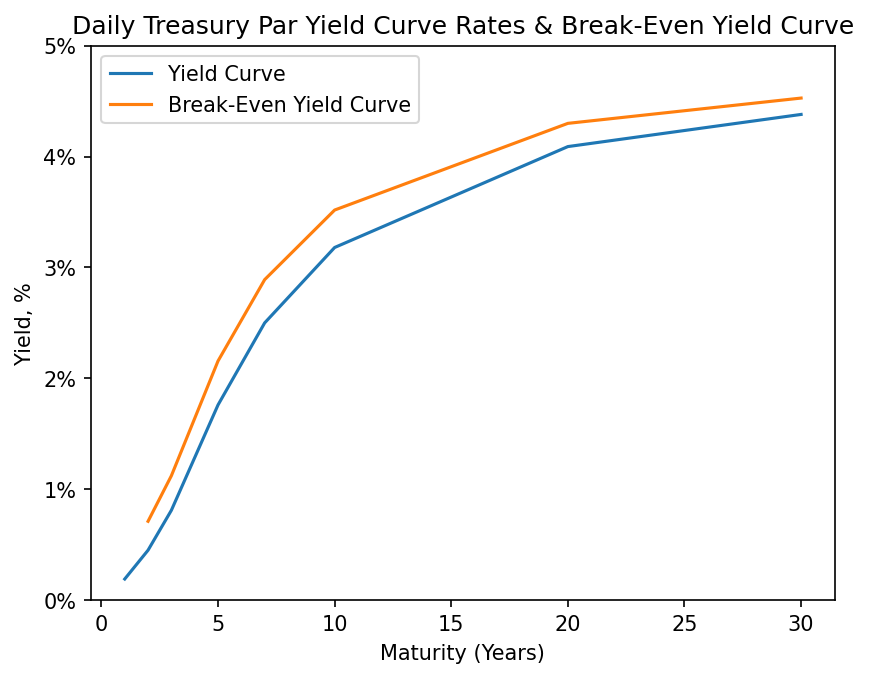

In [14]:
# For ease of comparison, this description approximates the break-even calculation for a “constant maturity” 10-year security. 
# A similar result would apply to a bond that is allowed to age over the horizon.

# June 30th, 2011 - Daily Treasury Par Yield Curve Rates
yield_curve = {1: 0.0019,
               2: 0.0045,
               3: 0.0081,
               5: 0.0176,
               7: 0.0250,
               10: 0.0318,
               20: 0.0409,
               30: 0.0438}

mat_x = [year for year in yield_curve.keys() if year != 1]

def breakeven_rate(short_maturity, short_yield, long_maturity, long_yield, per):
  short_discount = (1 + short_yield/per)**(short_maturity*per)
  long_discount = (1 + long_yield/per)**(long_maturity*per)
  return ((long_discount / short_discount)**(1/((long_maturity - short_maturity)*per)) - 1) * per

breakeven_y = [breakeven_rate(short_maturity=1,short_yield=yield_curve[1], long_maturity=year, long_yield=yield_curve[year], per=1) for year in mat_x]

plt.figure(num=0, dpi=150)
plt.plot(yield_curve.keys(), yield_curve.values(), label='Yield Curve')
plt.plot(mat_x, breakeven_y, label='Break-Even Yield Curve')
plt.ylim(ymin=0, ymax=0.05)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.title('Daily Treasury Par Yield Curve Rates & Break-Even Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield, %')
plt.legend()

In [15]:
for i in range(len(breakeven_y)):
  long_purchase = 100 / (1 + yield_curve[mat_x[i]])**mat_x[i]
  short_fv = long_purchase * (1 + yield_curve[1])
  long_sale = 100 / (1 + breakeven_y[i])**(mat_x[i] - 1)
  yield_diff = (breakeven_y[i] - yield_curve[mat_x[i]])*10_000
  print(f'Mat. = {mat_x[i]} {short_fv = :0.2f}, {long_sale = :0.2f}, {yield_diff = :0.0f}bps')

Mat. = 2 short_fv = 99.29, long_sale = 99.29, yield_diff = 26bps
Mat. = 3 short_fv = 97.79, long_sale = 97.79, yield_diff = 31bps
Mat. = 5 short_fv = 91.82, long_sale = 91.82, yield_diff = 40bps
Mat. = 7 short_fv = 84.29, long_sale = 84.29, yield_diff = 39bps
Mat. = 10 short_fv = 73.26, long_sale = 73.26, yield_diff = 34bps
Mat. = 20 short_fv = 44.94, long_sale = 44.94, yield_diff = 21bps
Mat. = 30 short_fv = 27.69, long_sale = 27.69, yield_diff = 15bps


For calculating break-even yields above a Treasury yield curve:
1. **Rate Changes Over One Year**: The break-even curve indicates how rates need to adjust over one year so that all investors, regardless of the bond's maturity, realize the same return as if they had invested in a 1-year Treasury bill.
2. **Short and Long Maturities**:
   - **Short Maturity**: This is typically the 1-year Treasury yield, which serves as the baseline or starting point for the break-even calculations.
   - **Long Maturity**: This can be any maturity in the yield curve (2, 3, 5, 7, 10, 20, 30 years).
3. **Calculating Break-Even Yield**: For each maturity on the curve (2 years, 3 years, etc.), you need to determine the rate change required so that the yield of the longer-maturity bond, adjusted over one year, matches the yield of the 1-year Treasury bill.

In essence, you’re figuring out what yield (i.e., what rate change) is needed for different maturities so investors get the same return as they would from a 1-year Treasury. That’s how these yields are plotted against the Treasury yield curve. It’s an elegant way to compare the returns of different maturities with a constant short-term benchmark.

This makes it possible to visualize, at a glance, how yields across various maturities would need to change for investors to remain indifferent between long-term and short-term bonds.

In [16]:
short_yield = 0.02
short_mat = 5
long_yield = 0.03
long_mat = 10

breakeven = breakeven_rate(short_maturity=short_mat, short_yield=short_yield, long_maturity=long_mat, long_yield=long_yield, per=1)

long_pv = 100 / (1+long_yield)**(long_mat)
print(f'{long_pv = :0.3f}, Year = 0, YTM = 3.00%')
short_fv = long_pv * (1+short_yield)**(short_mat)
print(f'{short_fv = :0.3f}, Year = 0, YTM = 2.00%')
print()
long_pv = 100 / (1+long_yield)**(long_mat - short_mat)
print(f'{long_pv = :0.3f}, Year = 5, YTM = 3.00%')
long_pv = 100 / (1+breakeven)**(long_mat - short_mat)
print(f'{long_pv = :0.3f}, Year = 5, Break-Even YTM = {breakeven :%}')

long_pv = 74.409, Year = 0, YTM = 3.00%
short_fv = 82.154, Year = 0, YTM = 2.00%

long_pv = 86.261, Year = 5, YTM = 3.00%
long_pv = 82.154, Year = 5, Break-Even YTM = 4.009804%


Consider a 2-year corporate zeros are priced at 95 to yield only 2.581% (s.a) and a 10-year zero yielding 5.174%

In [17]:
# Short Bond
short_years = 2
short_pv = 95
# Long Bond
long_years = 10
long_pv = 60

fv = 100
per = 2

short_ytm = ((fv/short_pv)**(1/(short_years*per)) - 1) * per
print(f'{short_ytm = }')
# Short FV if brought at Long PV
short_fv = long_pv * (1 + (short_ytm/per))**(short_years * per)
print(f'{short_fv = }')
short_interest = short_fv - long_pv
print(f'{short_interest = }')
print()

long_ytm = ((fv/long_pv)**(1/(long_years*per)) - 1) * per
print(f'{long_ytm = }')
# Value of Long Bond when Short Bond Matures
long_fv = long_pv * (1 + (long_ytm/per))**(short_years * per)
print(f'{long_fv = }')
# Interest Earned During The period
long_interest = long_fv - long_pv
print(f'{long_interest = }')
print()

profit = long_interest - short_interest
print(f'{profit = }')

breakeven_yield = ((100/short_fv)**(1/((long_years-short_years)*per)) - 1) * per
print(f'{breakeven_yield = }')

short_ytm = 0.025811789959920173
short_fv = 63.15789473684209
short_interest = 3.1578947368420884

long_ytm = 0.051740509078987085
long_fv = 66.45398059489737
long_interest = 6.453980594897374

profit = 3.296085858055285
breakeven_yield = 0.05827437795383439


In [18]:
short_mat = 2
short_yield = ((100/95)**(1/(short_mat*2)) - 1) * 2
long_mat = 10
long_yield = ((100/60)**(1/(long_mat*2)) - 1) * 2


breakeven = breakeven_rate(short_maturity=short_mat, short_yield=short_yield, long_maturity=long_mat, long_yield=long_yield, per=2)

long_pv = 100 / (1+long_yield/2)**(long_mat*2)
print(f'{long_pv = :0.3f}, Year = 0, YTM = {long_yield :%}')
short_fv = long_pv * (1+short_yield/2)**(short_mat*2)
print(f'{short_fv = :0.3f}, Year = 0, YTM = {short_yield :%}')
print()
long_pv = 100 / (1+long_yield/2)**((long_mat - short_mat)*2)
print(f'{long_pv = :0.3f}, Year = 2, YTM = {long_yield :%}')
print()
long_pv = 100 / (1+breakeven/2)**((long_mat - short_mat)*2)
print(f'{long_pv = :0.3f}, Year = 2, Break-Even = {breakeven :%}')

long_pv = 60.000, Year = 0, YTM = 5.174051%
short_fv = 63.158, Year = 0, YTM = 2.581179%

long_pv = 66.454, Year = 2, YTM = 5.174051%

long_pv = 63.158, Year = 2, Break-Even = 5.827438%


In [19]:
def breakeven_rate(short_maturity, short_yield, long_maturity, long_yield, per):
  long_pv = 100 / (1 + long_yield/per)**(long_maturity*per)
  short_fv = long_pv * (1 + short_yield/per)**(short_maturity*per)
  return ((100/short_fv)**(1/((long_years-short_years)*per)) - 1) * per

### Changes in Bond Prices and Yields

Bond prices change from day to day because of the **passage of time**, changes in **benchmark** and **spread** over (or under) the benchmark. Think of the yield as the investor’s **required rate of return** for holding the bond to its maturity and bearing the default risk. If for some reason investors require a higher (or lower) return for the bond, the price must fall (or rise).

It is useful for analysis to break a corporate bond yield into a **benchmark** and a **spread** over (or, perhaps, under) that benchmark. Then changes in the corporate yield are due to changes in the benchmark, changes in the spread, or some combination thereof. 

**Changes in Benchmark (Macroeconomic)**:
- Expected inflation
- Foreign exchange rates
- International capital flows
- Business cycles
- Monetary and fiscal policy

**Changes in Spread (Microeconomic)**
- Liquidity
- Tax status
- Potential losses if issuer defaults

### Credit Spreads and the Implied Probability of Default

A bondholder’s rate of return depends on when the default occurs and on any remaining value to the bond. Given all the possible outcomes for the realized rates of return, the mean of the probability distribution—that is, the *expected value*—will be less than the yield to maturity.

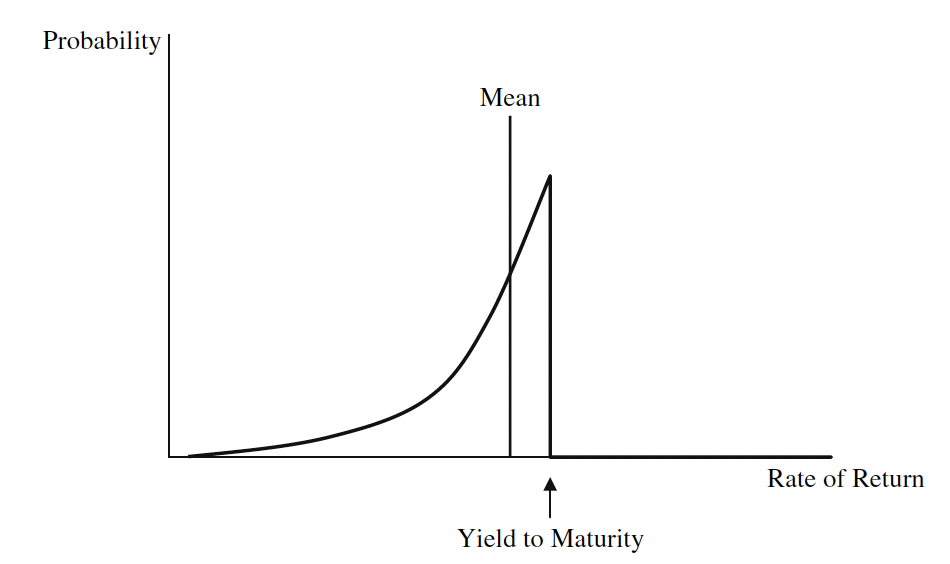
Probability Distribution for Rates of Return on a Corporate Bond to a Buy-and-Hold Investor

The key feature of the figure above is that the probability distribution is highly *skewed*. That’s because the yield to maturity is the maximum rate the hold-to-maturity investor will ever experience. As we’ve seen, the horizon yield could be higher or lower if the bond is sold prior to maturity, but now we’re assuming the intent is to the hold the bond for its full lifetime.

A nice application of bond math is to infer the probability of default given the prices on the risky zero-coupon corporate bond and an otherwise comparable risk-free security.

An approximation for the implied default probability directly uses the credit spread.

$$\text{Default Probability}=\frac{\text{Credit Spread}}{1-\text{Recovery Rate}}$$

In [20]:
per = 2

# 10-year zero-coupon corporate bond
cop_mat = 10
cop_pv = 60
cop_yield = ((100/cop_pv)**(1/(cop_mat*per)) - 1) * per

# Equivalent 10-year zero-coupon government bond
gov_mat = 10
gov_pv = 64
gov_yield = ((100/gov_pv)**(1/(gov_mat*per)) - 1) * per

credit_spread = cop_yield - gov_yield
price_spread = gov_pv - cop_pv

In [21]:
from prettytable import PrettyTable

# Probability of Default Calculation - Unconditional Probability
year = np.arange(1, cop_mat+1)
probability_default = ['Q' for _ in year]

# Risk-Free Value (value of the corporate bond if it were risk free) - constant-yield price trajectory
riskfree_value = np.array([round(100 / (1+gov_yield/per)**((gov_mat-i)*per), 3) for i in year])

# Recovery assuming a recovery rate of 40% of risk-free value
recovery_rate = 0.4 # Depending on the industry and the rank of the bond in the debt structure
recovery = np.array([round(value * recovery_rate, 3) for value in riskfree_value])

# Loss Severity
loss_severity = np.array([100 - value for value in recovery])

# Default Loss - loss at that time if default occurs—it is the riskfree value minus recovery
default_loss = np.array([round(riskfree_value[i-1] - recovery[i-1], 3) for i in year])

# Present value of default loss - risk-free rate is used to discount the losses
pv_default = np.array([round(default_loss[i-1]/((1+gov_yield/per)**(i*per)),3) for i in year])
# Here the present values turn out to be the same for each year—that’s because the bond is zero-coupon 
# and the recovery rate is assumed to be a constant share of the loss.

# Present Value of Expected Loss
expected_loss = np.array([str(default) + ' * Q' for default in pv_default])

# Output Table
table = PrettyTable()
table.add_column("Year", year)
table.add_column("Prob. of Default", probability_default)
table.add_column("Risk-Free Value", riskfree_value)
table.add_column("Recovery", recovery)
table.add_column("Default Loss", default_loss)
table.add_column("PV of Default Loss", pv_default)
table.add_column("Expected Loss", expected_loss)
print(table)

Q = price_spread/np.sum(pv_default)
print(f'{Q = :%}')

approx_implied_default_prob = credit_spread/(1 - recovery_rate)
print(f'{approx_implied_default_prob = :%}')

+------+------------------+-----------------+----------+--------------+--------------------+---------------+
| Year | Prob. of Default | Risk-Free Value | Recovery | Default Loss | PV of Default Loss | Expected Loss |
+------+------------------+-----------------+----------+--------------+--------------------+---------------+
|  1   |        Q         |      66.921     |  26.768  |    40.153    |        38.4        |    38.4 * Q   |
|  2   |        Q         |      69.975     |  27.99   |    41.985    |        38.4        |    38.4 * Q   |
|  3   |        Q         |      73.169     |  29.268  |    43.901    |        38.4        |    38.4 * Q   |
|  4   |        Q         |      76.508     |  30.603  |    45.905    |        38.4        |    38.4 * Q   |
|  5   |        Q         |       80.0      |   32.0   |     48.0     |        38.4        |    38.4 * Q   |
|  6   |        Q         |      83.651     |  33.46   |    50.191    |        38.4        |    38.4 * Q   |
|  7   |        Q  

In [22]:
probability_default = [round(Q,4) for _ in year]
expected_loss = np.array([default * Q for default in pv_default])


# Output Table
table = PrettyTable()
table.add_column("Year", year)
table.add_column("Prob. of Default", probability_default)
table.add_column("Risk-Free Value", riskfree_value)
table.add_column("Recovery", recovery)
table.add_column("Default Loss", default_loss)
table.add_column("PV of Default Loss", pv_default)
table.add_column("Expected Loss", expected_loss)
print(table)

print(np.sum(expected_loss))

+------+------------------+-----------------+----------+--------------+--------------------+---------------+
| Year | Prob. of Default | Risk-Free Value | Recovery | Default Loss | PV of Default Loss | Expected Loss |
+------+------------------+-----------------+----------+--------------+--------------------+---------------+
|  1   |      0.0104      |      66.921     |  26.768  |    40.153    |        38.4        |      0.4      |
|  2   |      0.0104      |      69.975     |  27.99   |    41.985    |        38.4        |      0.4      |
|  3   |      0.0104      |      73.169     |  29.268  |    43.901    |        38.4        |      0.4      |
|  4   |      0.0104      |      76.508     |  30.603  |    45.905    |        38.4        |      0.4      |
|  5   |      0.0104      |       80.0      |   32.0   |     48.0     |        38.4        |      0.4      |
|  6   |      0.0104      |      83.651     |  33.46   |    50.191    |        38.4        |      0.4      |
|  7   |      0.010

The probability calculated above is an unconditional probability of default. An alternative approach (which is harder to illustrate but more theoretically correct) is to estimate the probability of default for each year conditional on no prior default.

An important choice in this calculation is the risk-free rate. Using Treasury rates may not necessarily be the appropriate choice as Treasury bonds are more liquid (unlike corporate bonds that are illiquid and require liquidity premiums) and exempt from state and local income taxes. Ideally, the risk-free rate in this analysis is the yield on a bond having the same maturity, liquidity, and taxation as the corporate but default risk that approaches zero.

The advantage of the tabular method of calculating expected loss from default is its flexibility and explicit use of the time value of money. You can make the following modification to improve the computation:
- You can easily **vary the recovery rate** across the years, for example, if it is assumed that the current fixed assets of the issuer depreciate over time, or if there is an impending legal change that could affect creditors’ rights in bankruptcy court. 
- Also, you could **introduce a term structure of risk-free rates** instead of the flat yield curve assumed in the example.

### Questions

In [23]:
def zero_bond_ymt(n, pv, fv=100, freq=2):
    if freq == np.inf:
        return np.log(fv/pv) * (1/n)
    return ((fv/pv)**(1/(n*freq)) - 1) * freq

def zero_bond_pv(n, rate, fv=100, freq=2):
    if freq == np.inf:
        return fv / np.exp(rate*n)
    return fv / ((1 + rate/freq)**(n*freq))

def zero_bond_fv(n, rate, pv, freq):
    if freq == np.inf:
        return pv * np.exp(rate*n)    
    return pv * ((1 + rate/freq)**(n*freq))

def equivRate(rate, from_freq=1, to_freq=1):
  if from_freq == np.inf:
    return (np.exp(rate / to_freq) - 1) * to_freq
  elif to_freq == np.inf:
    return np.log(1 + rate / from_freq) * from_freq
  else:
    return to_freq * ((1 + rate/from_freq)**(from_freq/to_freq) - 1)

1. A buy-and-hold institutional investor expects market interest rates to be going up in the next few years. Which types of securities, differentiated only by coupon rate and time to maturity, are mostly likely to be preferred by the investor?
   1. High coupon rate, long-term securities
   2. **High coupon rate, short-term securities**
   3. Low coupon rate, long-term securities
   4. Low coupon rate, short-term securities

Buy-and-hold investors are concerned with cash flow reinvestment risk arising from coupon payments and the redemption of principal. If market rates are expected to be rising, the investor would prefer high coupon rates over low coupon rates because there is more cash flow to be reinvested at the higher rates. Also, the investor would prefer short-term over long-term securities because the principal can be reinvested sooner at the higher rates. Of course, this question neglects concerns over credit risk, liquidity, and transactions costs.

2. Coupon-stripping is the fixed-income arbitrage strategy of buying a coupon bond and selling its interest and principal cash flows separately as zero-coupon bonds as in the creation of TIGRS, CATS, and LIONS in the 1980s. Suppose a 3-year, 5% annual payment bond can be purchased at par value. Which pattern of zero-coupon bond prices allows an arbitrageur to carry out the strategy of coupon stripping, neglecting transactions costs? [Note that the bond prices are given per one unit of future or face value, i.e., they are discount factor.]
   1. **1 year, 0.97; 2-year, 0.92; 3-year, 0.87**
   2. 1 year, 0.96; 2-year, 0.91; 3-year, 0.86
   3. 1 year, 0.95; 2-year, 0.90; 3-year, 0.85
   4. 1 year, 0.94; 2-year, 0.89; 3-year, 0.84

Hint: Calculate the value of the stripped coupon bond by multiplying each cash flow by the zero-coupon bond price.

In [33]:
n = 3
coupon = 5
ytm = 0.05
cash_flows = np.full(n, coupon)
cash_flows[-1] += 100
# Discount Factor of Purchased Coupon Bond
discount_factor = np.full(n, (1 + ytm))**(-np.arange(1,n+1)) 
print(discount_factor)
# Price Paid for the Coupons
price = np.sum(cash_flows * discount_factor)
print(price)

[0.95238095 0.90702948 0.8638376 ]
100.0


In [34]:
# Discount Factor of Selling Coupon Bonds
factors = np.array([[0.97, 0.92, 0.87],
                    [0.96, 0.91, 0.86],
                    [0.95, 0.90, 0.85],
                    [0.94, 0.89, 0.84]])
# Calculate the value of the stripped coupon bond for each pattern of zero-coupon bond prices.
prices = np.sum(cash_flows * factors, axis=1)
print(prices)

[100.8   99.65  98.5   97.35]


3. Bond reconstitution is the fixed-income arbitrage strategy of buying a series of zero-coupon bonds such as C-STRIPS and P-STRIPS and selling the rebuilt coupon bond. Suppose a 3-year, 4% annual payment bond can be sold at par value. Which pattern of zero-coupon bond prices allows an arbitrageur to carry out the strategy of bond reconstitution, neglecting transactions costs?
   1. 1 year, 0.99; 2-year, 0.95; 3-year, 0.90
   2. 1 year, 0.98; 2-year, 0.94; 3-year, 0.89
   3. **1 year, 0.99; 2-year, 0.94; 3-year, 0.88**
   4. 1 year, 0.97; 2-year, 0.95; 3-year, 0.90

In [35]:
n = 3
coupon = 4
cash_flows = np.full(n, coupon)
cash_flows[-1] += 100
factors = np.array([[0.99, 0.95, 0.90],
                    [0.98, 0.94, 0.89],
                    [0.99, 0.94, 0.88],
                    [0.97, 0.95, 0.90]])
prices = np.sum(cash_flows * factors, axis=1)
print(prices)

[101.36 100.24  99.24 101.28]


4. Suppose that a 2-year, USD10 million par value, 2% annual coupon payment government bond can be bought or sold at 101. Zero-coupon government bonds can be bought or sold at 99.20 for a maturity of one year and at 96.50 for two years. Each price is the percentage of par value. Which statement is best describes the arbitrage opportunity that is available?
   1. The potential profit from coupon stripping is $58,600.
   2. The potential profit from bond reconstitution is $58,600.
   3. The potential profit from coupon stripping is $100,000.
   4. The potential profit from bond reconstitution is $100,000.

The cash flows on the 2-year, $10 million par value, 2% annual coupon payment government bond are $200,000 at the end of the first year (0.02 * $10,000,000) and $10,200,000 at the end of the second year when the principal is redeemed. The purchase or sale price for the bond is $10,100,000, which is 1.01 * $10,000,000. The break-even, or no-arbitrage, value for the 2-year, 2% government bond is the amount based on the prices of the zero-coupon bonds. 

($200,000 * 0.9920) + ($10,200,000 * 0.9650) = $10,041,400

The arbitrage strategy that is available, neglecting transactions costs, is bond reconstitution. Buy the zero-coupon bonds—the 1-year zero for a face value of $200,000 and 2-year zero for a face value of $10,200,000. The total cost is $10,041,400. Sell the reconstituted 2-year, 2% coupon bond for $10,100,000. The profit is the difference, $58,600.

In [27]:
# Zero-coupon gov. bonds stated as discount factor
discount_factor = np.array([0.992, 0.965])
# Cash flow from gov. coupon bond
cash_flows = np.array([200_000, 10_200_000])
coupon_bond_price = 10_100_000

# Price to reconstitute the zero-coupons
price_reconstitution = np.sum(cash_flows * discount_factor)
# Profit/Loss
profit = coupon_bond_price - price_reconstitution

print(f'{profit = :_}')

profit = 58_600.0


5. Which statement best explains why long-term P-STRIPS usually are priced a bit higher than C-STRIPS maturing on the same date?
   1. C-STRIPS are more liquid than P-STRIPS.
   2. **P-STRIPS are available in greater supply.**
   3. C-STRIPS have greater “optionality” because they can be used in a bond reconstitution arbitrage strategy.
   4. P-STRIPS are federal tax-exempt whereas C-STRIPS are taxable.

Long-term P-STRIPS are more liquid than C-STRIPS because they are available in greater supply; hence the price of P-STRIPS is usually higher than C-STRIPS having the same maturity date. Also, owning P-STRIPS can facilitate bond reconstitution because only the sequence of C-STRIPS is needed to rebuild the coupon bond. The taxation of P-STRIPS and C-STRIPS is the same

6. A 10-year zero-coupon bond is priced at 57.5 (per 100 of par value). The bond’s yield to maturity, stated as an annual percentage rate for semiannual compounding (i.e., a semiannual bond basis having a periodicity of 2) is closest to:

In [28]:
pv = 57.5
n = 10
freq = 2
ytm = zero_bond_ymt(n=n, pv=pv, fv=100, freq=freq)
print(f'{ytm = :0.3%}')

ytm = 5.611%


7. A 20-year zero-coupon bond is priced at 30 (per 100 of par value). The bond’s yield to maturity, stated as an annual percentage rate for daily compounding (a periodicity of 365) is closest to:

In [29]:
pv = 30
n = 20
freq = 365
ytm = zero_bond_ymt(n=n, pv=pv, fv=100, freq=freq)
print(f'{ytm = :0.3%}')

ytm = 6.020%


8. A 5-year zero-coupon bond is priced at 80 (per 100 of par value). The bond’s yield to maturity, stated as an annual percentage rate for continuous compounding (a periodicity of infinity) is closest to:

In [30]:
pv = 80
n = 5
freq = np.inf
ytm = zero_bond_ymt(n=n, pv=pv, fv=100, freq=freq)
print(f'{ytm = :0.3%}')

ytm = 4.463%


9. The annual yield to maturity on a 30-year zero-coupon bond is stated to be 6.824% on a continuously compounded basis. That yield converted to a semiannual bond basis (a periodicity of 2) is closest to:

In [31]:
continous_rate = 0.06824
apr_2 = equivRate(continous_rate, from_freq=np.inf, to_freq=2)
print(f'{apr_2 = :0.3%}')

apr_2 = 6.942%


10.	Suppose an investor buys a $100,000, 15-year zero-coupon bond at a price of $48,000. Two years later, the investor sells the bond at a price of $55,000. In principle, the capital gain associated with this investment is:
    1. 0, the difference between the sale price of $55,000 and the purchase price of $48,000 is all interest income to the investor.
    2. **$2,065, the difference between the sale price of $55,000 and $52,935, the carrying value at the time of sale, is the capital gain to the investor.**
    3. $7,000, the difference between the sale price $55,000 and the purchase price of $48,000 is all capital gain to the investor.

Note that this is the economic capital gain; the taxable capital gain might differ depending on the tax rules that are in effect.

In [88]:
def capital_gains(purchase_price, current_price, par_value, years_to_maturity_purchase, years_to_mat, per):
    purchase_ytm = ((par_value/purchase_price)**(1/(years_to_maturity_purchase*per)) - 1) * per
    constant_yield_price = par_value / ((1 + purchase_ytm/per)**(years_to_mat*per))
    current_ytm = ((par_value/current_price)**(1/(years_to_mat*per)) - 1) * per
    return (current_price - constant_yield_price), (constant_yield_price - purchase_price), current_ytm

capital_gains(purchase_price=48_000, current_price=55_000, par_value=100_000, years_to_maturity_purchase=15,years_to_mat=13, per=1)[0]

2065.0623685145474

11.	A 3-year, zero-coupon corporate bond is priced at 78 (percent of par value) to yield 8.4559% (s.a.). A 3-year, zero-coupon government bond, which is assumed to be (default) risk-free, is priced at 82.5 (percent of par value) to yield 6.5163% (s.a.). Assume that the recovery rate if the corporate bond defaults would be 30% of the risk-free value. Using the tabular method, the probability of default for each year is closest to:

In [62]:
# Probability of Default Calculation - Unconditional Probability
per = 2
mat = 3

# Zero-coupon corporate bond
cop_pv = 78
cop_yield = ((100/cop_pv)**(1/(mat*per)) - 1) * per

# Zero-coupon government bond
gov_pv = 82.5
gov_yield = ((100/gov_pv)**(1/(mat*per)) - 1) * per

credit_spread = cop_yield - gov_yield
price_spread = gov_pv - cop_pv

In [87]:
year = np.arange(mat) + 1

# Risk-Free Value - constant-yield price trajectory
riskfree_value = np.full(mat, 100) * (1 + gov_yield/per)**(-(year[::-1]-1)*per)

# Recovery of 30% of risk-free value
recovery_rate = 0.3
recovery = riskfree_value * recovery_rate

# Default Loss - loss at that time if default occurs
default_loss = riskfree_value - recovery

# Present value of default loss - risk-free rate is used to discount the losses
pv_default = default_loss * (1 + gov_yield/per)**(-year*per)
Q = price_spread/np.sum(pv_default)
expected_loss = pv_default * Q

print(f'{Q = :%}')

table = PrettyTable()
table.add_column("Year", year)
table.add_column("Rf Value", riskfree_value.round(3))
table.add_column("Recovery", recovery.round(3))
table.add_column("Default Loss", default_loss.round(3))
table.add_column("PV of Default Loss", pv_default.round(3))
table.add_column("Expected Loss", expected_loss.round(3))
print(table)

Q = 2.597403%
+------+----------+----------+--------------+--------------------+---------------+
| Year | Rf Value | Recovery | Default Loss | PV of Default Loss | Expected Loss |
+------+----------+----------+--------------+--------------------+---------------+
|  1   |  87.964  |  26.389  |    61.574    |       57.75        |      1.5      |
|  2   |  93.789  |  28.137  |    65.652    |       57.75        |      1.5      |
|  3   |  100.0   |   30.0   |     70.0     |       57.75        |      1.5      |
+------+----------+----------+--------------+--------------------+---------------+


12.	Suppose an investor buys a $50,000, 10-year zero-coupon bond for a price of $33,500. One year later, the investor sells the bond at a price of $38,000. In principle, the interest income for the 1-year holding period is:
    1. 0, there is no interest income on a zero-coupon bond.
    2. $4,500, the difference between the purchase and sale prices is the interest income.
    3. **$1,369, the difference between the carrying value at the time of sale and the purchase price is the interest income.**
    4. $3,131, the difference between the sale price and carrying value at the time of sale is the interest income.

In [93]:
def capital_gains(purchase_price, current_price, par_value, years_to_maturity_purchase, years_to_mat, per):
    purchase_ytm = ((par_value/purchase_price)**(1/(years_to_maturity_purchase*per)) - 1) * per
    constant_yield_price = par_value / ((1 + purchase_ytm/per)**(years_to_mat*per))
    current_ytm = ((par_value/current_price)**(1/(years_to_mat*per)) - 1) * per
    return (current_price - constant_yield_price), (constant_yield_price - purchase_price), current_ytm

interest_income = capital_gains(purchase_price=33_500, current_price=38_000, par_value=50_000, years_to_maturity_purchase=10,years_to_mat=9, per=1)[1]
print(f'{interest_income = :0.0f}')

interest_income = 1369


13.	A 5-year, zero-coupon corporate bond is priced at 75.75 (percent of par value). A 5-year, zero-coupon government bond, which is assumed to be (default) risk-free, is priced at 78.25 (percent of par value). Assume that the recovery rate if the corporate bond defaults would be 40% of the risk-free value. Using the tabular method, the probability of default for each year is closest to:

In [97]:
# Probability of Default Calculation - Unconditional Probability
per = 1
mat = 5

# Zero-coupon corporate bond
cop_pv = 75.75
cop_yield = ((100/cop_pv)**(1/(mat*per)) - 1) * per

# Zero-coupon government bond
gov_pv = 78.25
gov_yield = ((100/gov_pv)**(1/(mat*per)) - 1) * per

credit_spread = cop_yield - gov_yield
price_spread = gov_pv - cop_pv

year = np.arange(mat) + 1

# Risk-Free Value - constant-yield price trajectory
riskfree_value = np.full(mat, 100) * (1 + gov_yield/per)**(-(year[::-1]-1)*per)

# Recovery of 30% of risk-free value
recovery_rate = 0.4
recovery = riskfree_value * recovery_rate

# Default Loss - loss at that time if default occurs
default_loss = riskfree_value - recovery

# Present value of default loss - risk-free rate is used to discount the losses
pv_default = default_loss * (1 + gov_yield/per)**(-year*per)
Q = price_spread/np.sum(pv_default)
expected_loss = pv_default * Q

print(f'{Q = :%}')

table = PrettyTable()
table.add_column("Year", year)
table.add_column("Rf Value", riskfree_value.round(3))
table.add_column("Recovery", recovery.round(3))
table.add_column("Default Loss", default_loss.round(3))
table.add_column("PV of Default Loss", pv_default.round(3))
table.add_column("Expected Loss", expected_loss.round(3))
print(table)

Q = 1.064963%
+------+----------+----------+--------------+--------------------+---------------+
| Year | Rf Value | Recovery | Default Loss | PV of Default Loss | Expected Loss |
+------+----------+----------+--------------+--------------------+---------------+
|  1   |  82.184  |  32.874  |    49.31     |       46.95        |      0.5      |
|  2   |  86.316  |  34.526  |    51.79     |       46.95        |      0.5      |
|  3   |  90.655  |  36.262  |    54.393    |       46.95        |      0.5      |
|  4   |  95.213  |  38.085  |    57.128    |       46.95        |      0.5      |
|  5   |  100.0   |   40.0   |     60.0     |       46.95        |      0.5      |
+------+----------+----------+--------------+--------------------+---------------+
